In [1]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.decomposition import PCA
from sklearn.manifold import MDS
from sklearn.preprocessing import StandardScaler
import pandas as pd

In [2]:
# Load and Standardize the Wine dataset
data = load_wine()
X = data.data
y = data.target
X_scaled = StandardScaler().fit_transform(X)


In [3]:
# Apply PCA (2D)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)


In [4]:
# Apply Metric MDS (2D)
mds_metric = MDS(n_components=2, metric=True, random_state=42, n_init=4, max_iter=300)
X_mds_metric = mds_metric.fit_transform(X_scaled)


In [5]:
# Apply Non-Metric MDS (2D)
mds_nonmetric = MDS(n_components=2, metric=False, random_state=42, n_init=4, max_iter=300)
X_mds_nonmetric = mds_nonmetric.fit_transform(X_scaled)


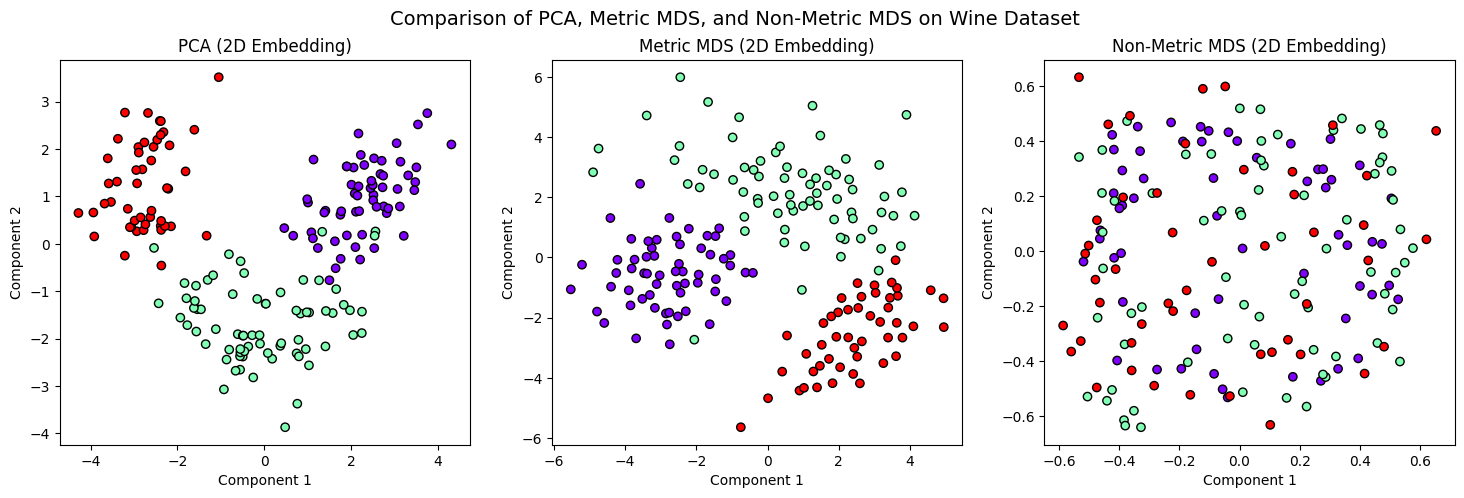

In [6]:
# Visualize embeddings side-by-side
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
methods = ["PCA", "Metric MDS", "Non-Metric MDS"]
embeddings = [X_pca, X_mds_metric, X_mds_nonmetric]

for ax, method, X_emb in zip(axes, methods, embeddings):
    scatter = ax.scatter(X_emb[:, 0], X_emb[:, 1], c=y, cmap='rainbow', edgecolor='k')
    ax.set_title(f"{method} (2D Embedding)")
    ax.set_xlabel("Component 1")
    ax.set_ylabel("Component 2")

plt.suptitle("Comparison of PCA, Metric MDS, and Non-Metric MDS on Wine Dataset", fontsize=14)
plt.show()


In [7]:
# Stress Function Analysis for Non-Metric MDS
stress_values = []
dimensions = range(1, 10)

for dim in dimensions:
    mds = MDS(n_components=dim, metric=False, random_state=42, n_init=2, max_iter=200)
    mds.fit(X_scaled)
    stress_values.append(mds.stress_)


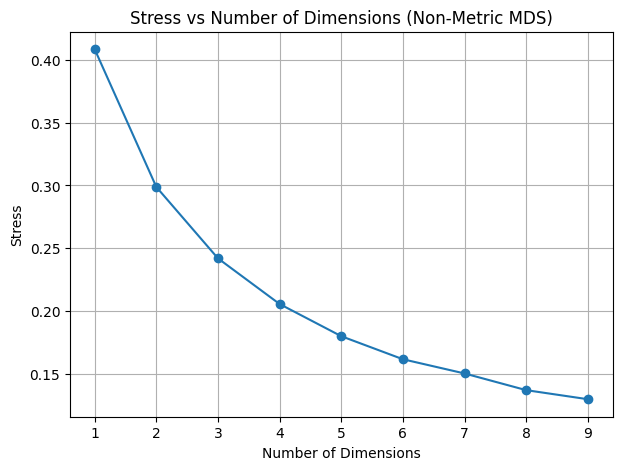

In [8]:
# Plot Stress vs Dimensions
plt.figure(figsize=(7,5))
plt.plot(dimensions, stress_values, marker='o')
plt.title("Stress vs Number of Dimensions (Non-Metric MDS)")
plt.xlabel("Number of Dimensions")
plt.ylabel("Stress")
plt.grid(True)
plt.show()

In [10]:
# Explanation Output
print("PCA: Linear projection preserving global variance.")
print("Metric MDS: Preserves pairwise distances (Euclidean metric).")
print("Non-Metric MDS: Preserves rank order of distances (useful for nonlinear structures).")
print("\nObservation:")
print("→ PCA shows clear clusters when the data is linearly separable.")
print("→ Metric MDS gives similar but slightly more flexible embeddings.")
print("→ Non-Metric MDS may show better separation when data relationships are non-linear.")
print("\nStress decreases as dimensionality increases because higher dimensions allow")
print("the embedding to represent original distances more accurately, reducing distortion.")

PCA: Linear projection preserving global variance.
Metric MDS: Preserves pairwise distances (Euclidean metric).
Non-Metric MDS: Preserves rank order of distances (useful for nonlinear structures).

Observation:
→ PCA shows clear clusters when the data is linearly separable.
→ Metric MDS gives similar but slightly more flexible embeddings.
→ Non-Metric MDS may show better separation when data relationships are non-linear.

Stress decreases as dimensionality increases because higher dimensions allow
the embedding to represent original distances more accurately, reducing distortion.
